<a name='1'></a>
## 1 - Packages

As usual, begin by loading in the packages.

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
x_train_orig, y_train_orig, x_test_orig, y_test_orig, classes = load_happy_dataset()

# Normalize image vectors
x_train = x_train_orig/255.
x_test = x_test_orig/255.

# Reshape
y_train = y_train_orig.T
y_test = y_test_orig.T

print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("x_train shape: " + str(x_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

number of training examples = 600
number of test examples = 150
x_train shape: (600, 64, 64, 3)
y_train shape: (600, 1)
x_test shape: (150, 64, 64, 3)
y_test shape: (150, 1)


In [18]:
x_train_orig[1].shape

(64, 64, 3)

In [19]:
x_train_orig[1] # the range of the train image value is 0 to 255

array([[[193, 204, 168],
        [188, 203, 155],
        [215, 227, 181],
        ...,
        [219, 215, 208],
        [191, 185, 170],
        [173, 165, 142]],

       [[201, 213, 182],
        [200, 214, 169],
        [204, 215, 164],
        ...,
        [254, 254, 252],
        [224, 231, 222],
        [201, 212, 184]],

       [[204, 213, 178],
        [211, 220, 184],
        [207, 215, 175],
        ...,
        [242, 248, 240],
        [200, 219, 197],
        [184, 204, 176]],

       ...,

       [[167, 185, 199],
        [135, 149, 174],
        [118, 127, 147],
        ...,
        [ 36,  31,  28],
        [ 36,  31,  28],
        [ 34,  31,  27]],

       [[139, 154, 179],
        [115, 126, 145],
        [104, 111, 125],
        ...,
        [ 35,  30,  27],
        [ 35,  30,  27],
        [ 37,  33,  29]],

       [[119, 130, 149],
        [104, 110, 124],
        [ 93,  98, 108],
        ...,
        [ 34,  29,  26],
        [ 33,  29,  25],
        [ 37,  33,  29]]

In [20]:
x_train[1] # after normalize the range is from 0 to 1

array([[[0.75686275, 0.8       , 0.65882353],
        [0.7372549 , 0.79607843, 0.60784314],
        [0.84313725, 0.89019608, 0.70980392],
        ...,
        [0.85882353, 0.84313725, 0.81568627],
        [0.74901961, 0.7254902 , 0.66666667],
        [0.67843137, 0.64705882, 0.55686275]],

       [[0.78823529, 0.83529412, 0.71372549],
        [0.78431373, 0.83921569, 0.6627451 ],
        [0.8       , 0.84313725, 0.64313725],
        ...,
        [0.99607843, 0.99607843, 0.98823529],
        [0.87843137, 0.90588235, 0.87058824],
        [0.78823529, 0.83137255, 0.72156863]],

       [[0.8       , 0.83529412, 0.69803922],
        [0.82745098, 0.8627451 , 0.72156863],
        [0.81176471, 0.84313725, 0.68627451],
        ...,
        [0.94901961, 0.97254902, 0.94117647],
        [0.78431373, 0.85882353, 0.77254902],
        [0.72156863, 0.8       , 0.69019608]],

       ...,

       [[0.65490196, 0.7254902 , 0.78039216],
        [0.52941176, 0.58431373, 0.68235294],
        [0.4627451 , 0

You can display the images contained in the dataset. Images are **64x64** pixels in RGB format (3 channels).

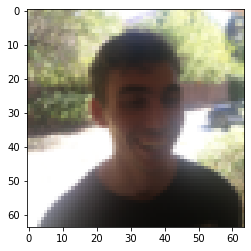

In [22]:
index = 300
plt.imshow(X_train_orig[index]) #display sample training image
plt.show()

In [4]:
# GRADED FUNCTION: happyModel

def happyModel():

    #ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            ## Conv2D with 32 7x7 filters and stride of 1
            ## BatchNormalization for axis 3
            ## ReLU
            ## Max Pooling 2D with default parameters
            ## Flatten layer
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            # YOUR CODE STARTS HERE
            tf.keras.layers.ZeroPadding2D(padding=3, input_shape = (64, 64, 3)),
            tf.keras.layers.Conv2D(filters = 32, kernel_size = 7, strides=1),
            tf.keras.layers.BatchNormalization(axis=3),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
            # YOUR CODE ENDS HERE
        ])
    
    return model

In [5]:
happy_model = happyModel()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)
    
output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]
    
comparator(summary(happy_model), output)




['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


#### Expected Output:

```
['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!
```

In [6]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [7]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

## Train & Test

In [8]:
happy_model.fit(X_train, Y_train, epochs=10, batch_size=16)

Epoch 1/10


38/38 [==============================] - 2s 23ms/step - loss: 1.5226 - accuracy: 0.6833
Epoch 2/10
38/38 [==============================] - 1s 24ms/step - loss: 0.2739 - accuracy: 0.8950
Epoch 3/10
38/38 [==============================] - 1s 30ms/step - loss: 0.2035 - accuracy: 0.9233
Epoch 4/10
38/38 [==============================] - 1s 26ms/step - loss: 0.1427 - accuracy: 0.9467
Epoch 5/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0945 - accuracy: 0.9733
Epoch 6/10
38/38 [==============================] - 1s 24ms/step - loss: 0.0707 - accuracy: 0.9767
Epoch 7/10
38/38 [==============================] - 1s 25ms/step - loss: 0.0972 - accuracy: 0.9550
Epoch 8/10
38/38 [==============================] - 1s 31ms/step - loss: 0.0769 - accuracy: 0.9733
Epoch 9/10
38/38 [==============================] - 1s 30ms/step - loss: 0.1150 - accuracy: 0.9567
Epoch 10/10
38/38 [==============================] - 1s 25ms/step - loss: 0.1238 - accuracy: 0.9667


In [10]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 13ms/step - loss: 0.4452 - accuracy: 0.8267


[0.44522836804389954, 0.8266666531562805]

In [14]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
    
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]
    
comparator(summary(conv_model), output)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         392       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          528       
_________________________________________________________________
re_lu_2 (ReLU)               (None, 8, 8, 16)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)         